In [38]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Création du circuit quantique
Les livres ayant tous la même probabilité d'être emprunté, on rajoute des portes Hadammar sur les deux qubits pour les mettre en superposition

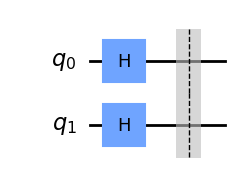

In [39]:
circ = QuantumCircuit(2)

circ.h(0)
circ.h(1)
circ.barrier()
circ.draw("mpl")

# Oracle
Nous permet de marquer un grimoire, qui aura sa probabilité inversé par rapport aux autres grimoires

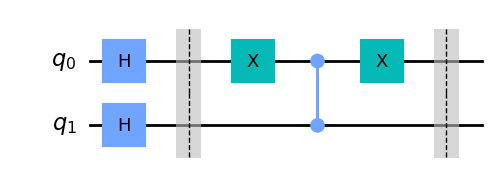

In [40]:
circ.x(0)
circ.cz(0, 1)
circ.x(0)
circ.barrier()
circ.draw("mpl")

# Diffuseur
Le diffuseur va mettre tout les grimoires à null, sauf le grimoire marqué

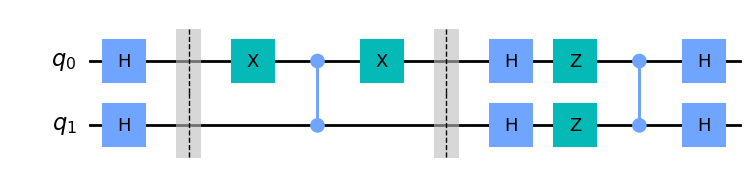

In [41]:
circ.h(0)
circ.h(1)
circ.z(0)
circ.z(1)
circ.cz(0, 1)
circ.h(0)
circ.h(1)
circ.draw("mpl")

# Comptoir d'emprunt
On applique les mesures

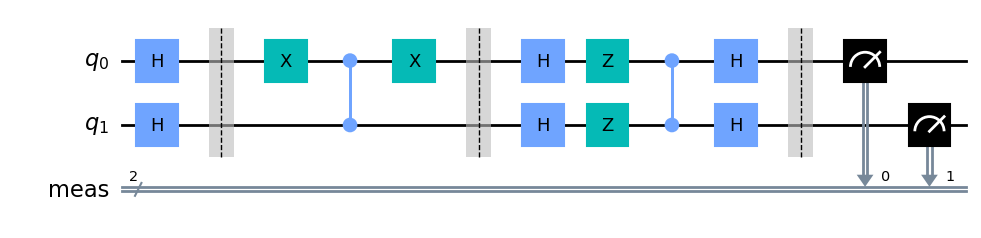

In [42]:
circ.measure_all()
circ.draw('mpl')

# Résultats

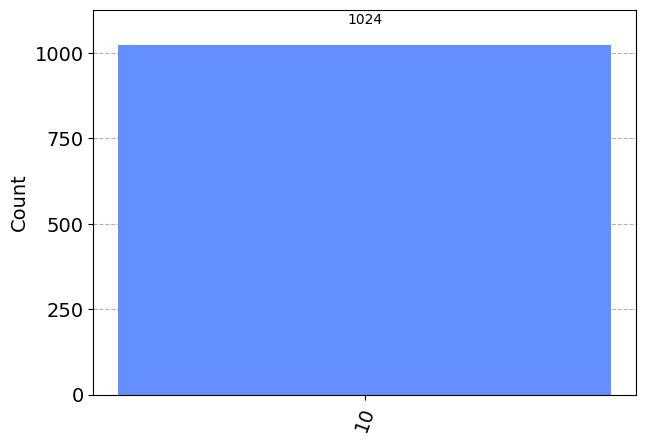

In [43]:
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)